### Описание задания:
В домашнем задании нужно решить задачу классификации физических лиц по уровню дохода.
Данные для обучения модели хранятся в файле adult.csv, который можно найти в материалах к занятию или скачать с сайта.
Целевая переменная – уровень дохода income, который принимает два значения <=50K и >50K, поэтому классификация бинарная. Остальные признаки описывают персональную информацию – возраст, образование, семейное положение и т. д. Подробное описание признаков и их возможные значения можно получить самостоятельно, используя функции Python3 для анализа датасета (describe, unique и т.д) или прочитать информацию по ссылке.
Задачу классификации нужно решить при помощи обучения модели логистической регрессии и модели опорных векторов.

### Этапы работы:
- Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)
- Проведите первичный анализ.
-- Проверьте данные на пропуски. Удалите в случае обнаружения. *Предложите альтернативный способ работы с пропусками
-- Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)
- Преобразуйте категориальные признаки.
- Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.
- Обучите модели логистической регрессии и опорных векторов на обучающем множестве.
- Для тестового множества предскажите уровень дохода и сравните с истинным значением, посчитав точность предсказания моделей. Для этого используйте встроенную функцию score.
- Сформулируйте выводы по проделанной работе.
- Кратко опишите какие преобразования были сделаны с данными.
- Сравните точность двух моделей.
- Напишите свое мнение, в полной ли мере модели справились с поставленной задачей. *Что по вашему мнению нужно сделать, чтобы улучшить результат ?

Для получения зачета по этому домашнему заданию, минимально, должно быть реализовано обучение двух моделей классификации, выведена их точность.

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [4]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Пропусков нет.
Но в строке 4 - есть символы ? вместо значений.
Эти симвлоы стоит удалить

In [6]:
df[df=='?'] = np.nan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


есть пропуски в колонках
- workclass
- occupation
- native-country

Эти данные, кажутся важными для анализа. Поэтому исключить их их анализа нельзя.
Поскольку данные текстовые, то можно заменить пропуски на самое частое значение в колонке.
Однако, для упрощения, мы целиком удалим строки, т.к. пропусков не много.

In [7]:
df.dropna(inplace=True)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


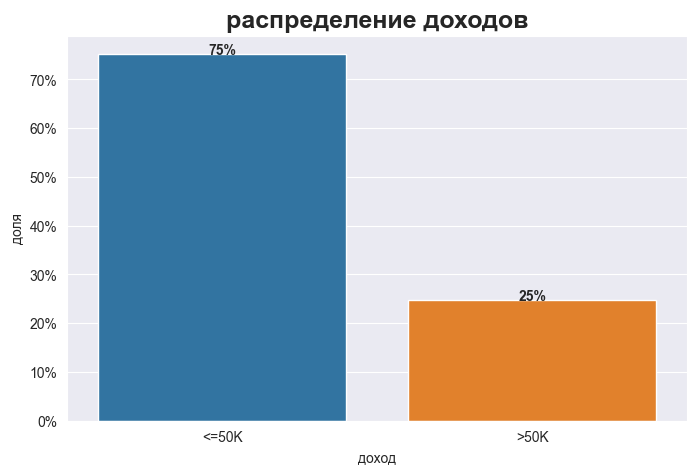

In [8]:
plt.figure(figsize = (8,5))
plt.title('распределение доходов', fontsize=18, fontweight='bold')
eda_percentage = df['income'].value_counts(normalize = True).rename_axis('доход').reset_index(name = 'доля')

ax = sns.barplot(x = 'доход', y = 'доля', data = eda_percentage)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1), ha='center', fontweight='bold')

Распределение доходов не сбалансировано. Большая часть людей имеет доход <=50K
Это негативно скажется на качестве модели.


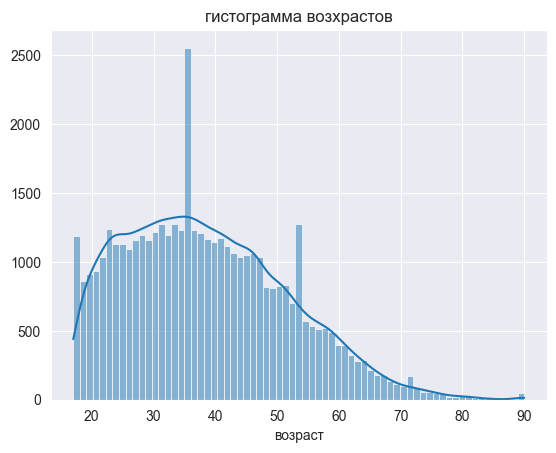

In [9]:
sns.histplot(data = df, x='age', kde=True)
plt.title('гистограмма возхрастов')
plt.xlabel('возраст')
plt.ylabel('')
plt.show()

<Axes: title={'center': 'распределение по часам работы'}, ylabel='Density'>

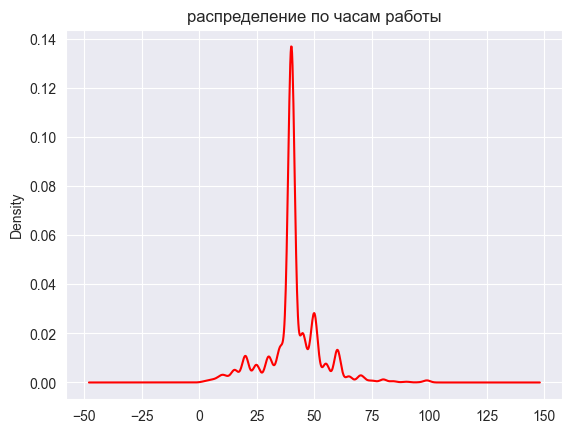

In [10]:
df['hours-per-week'].plot(kind='kde', title='распределение по часам работы', color='r')

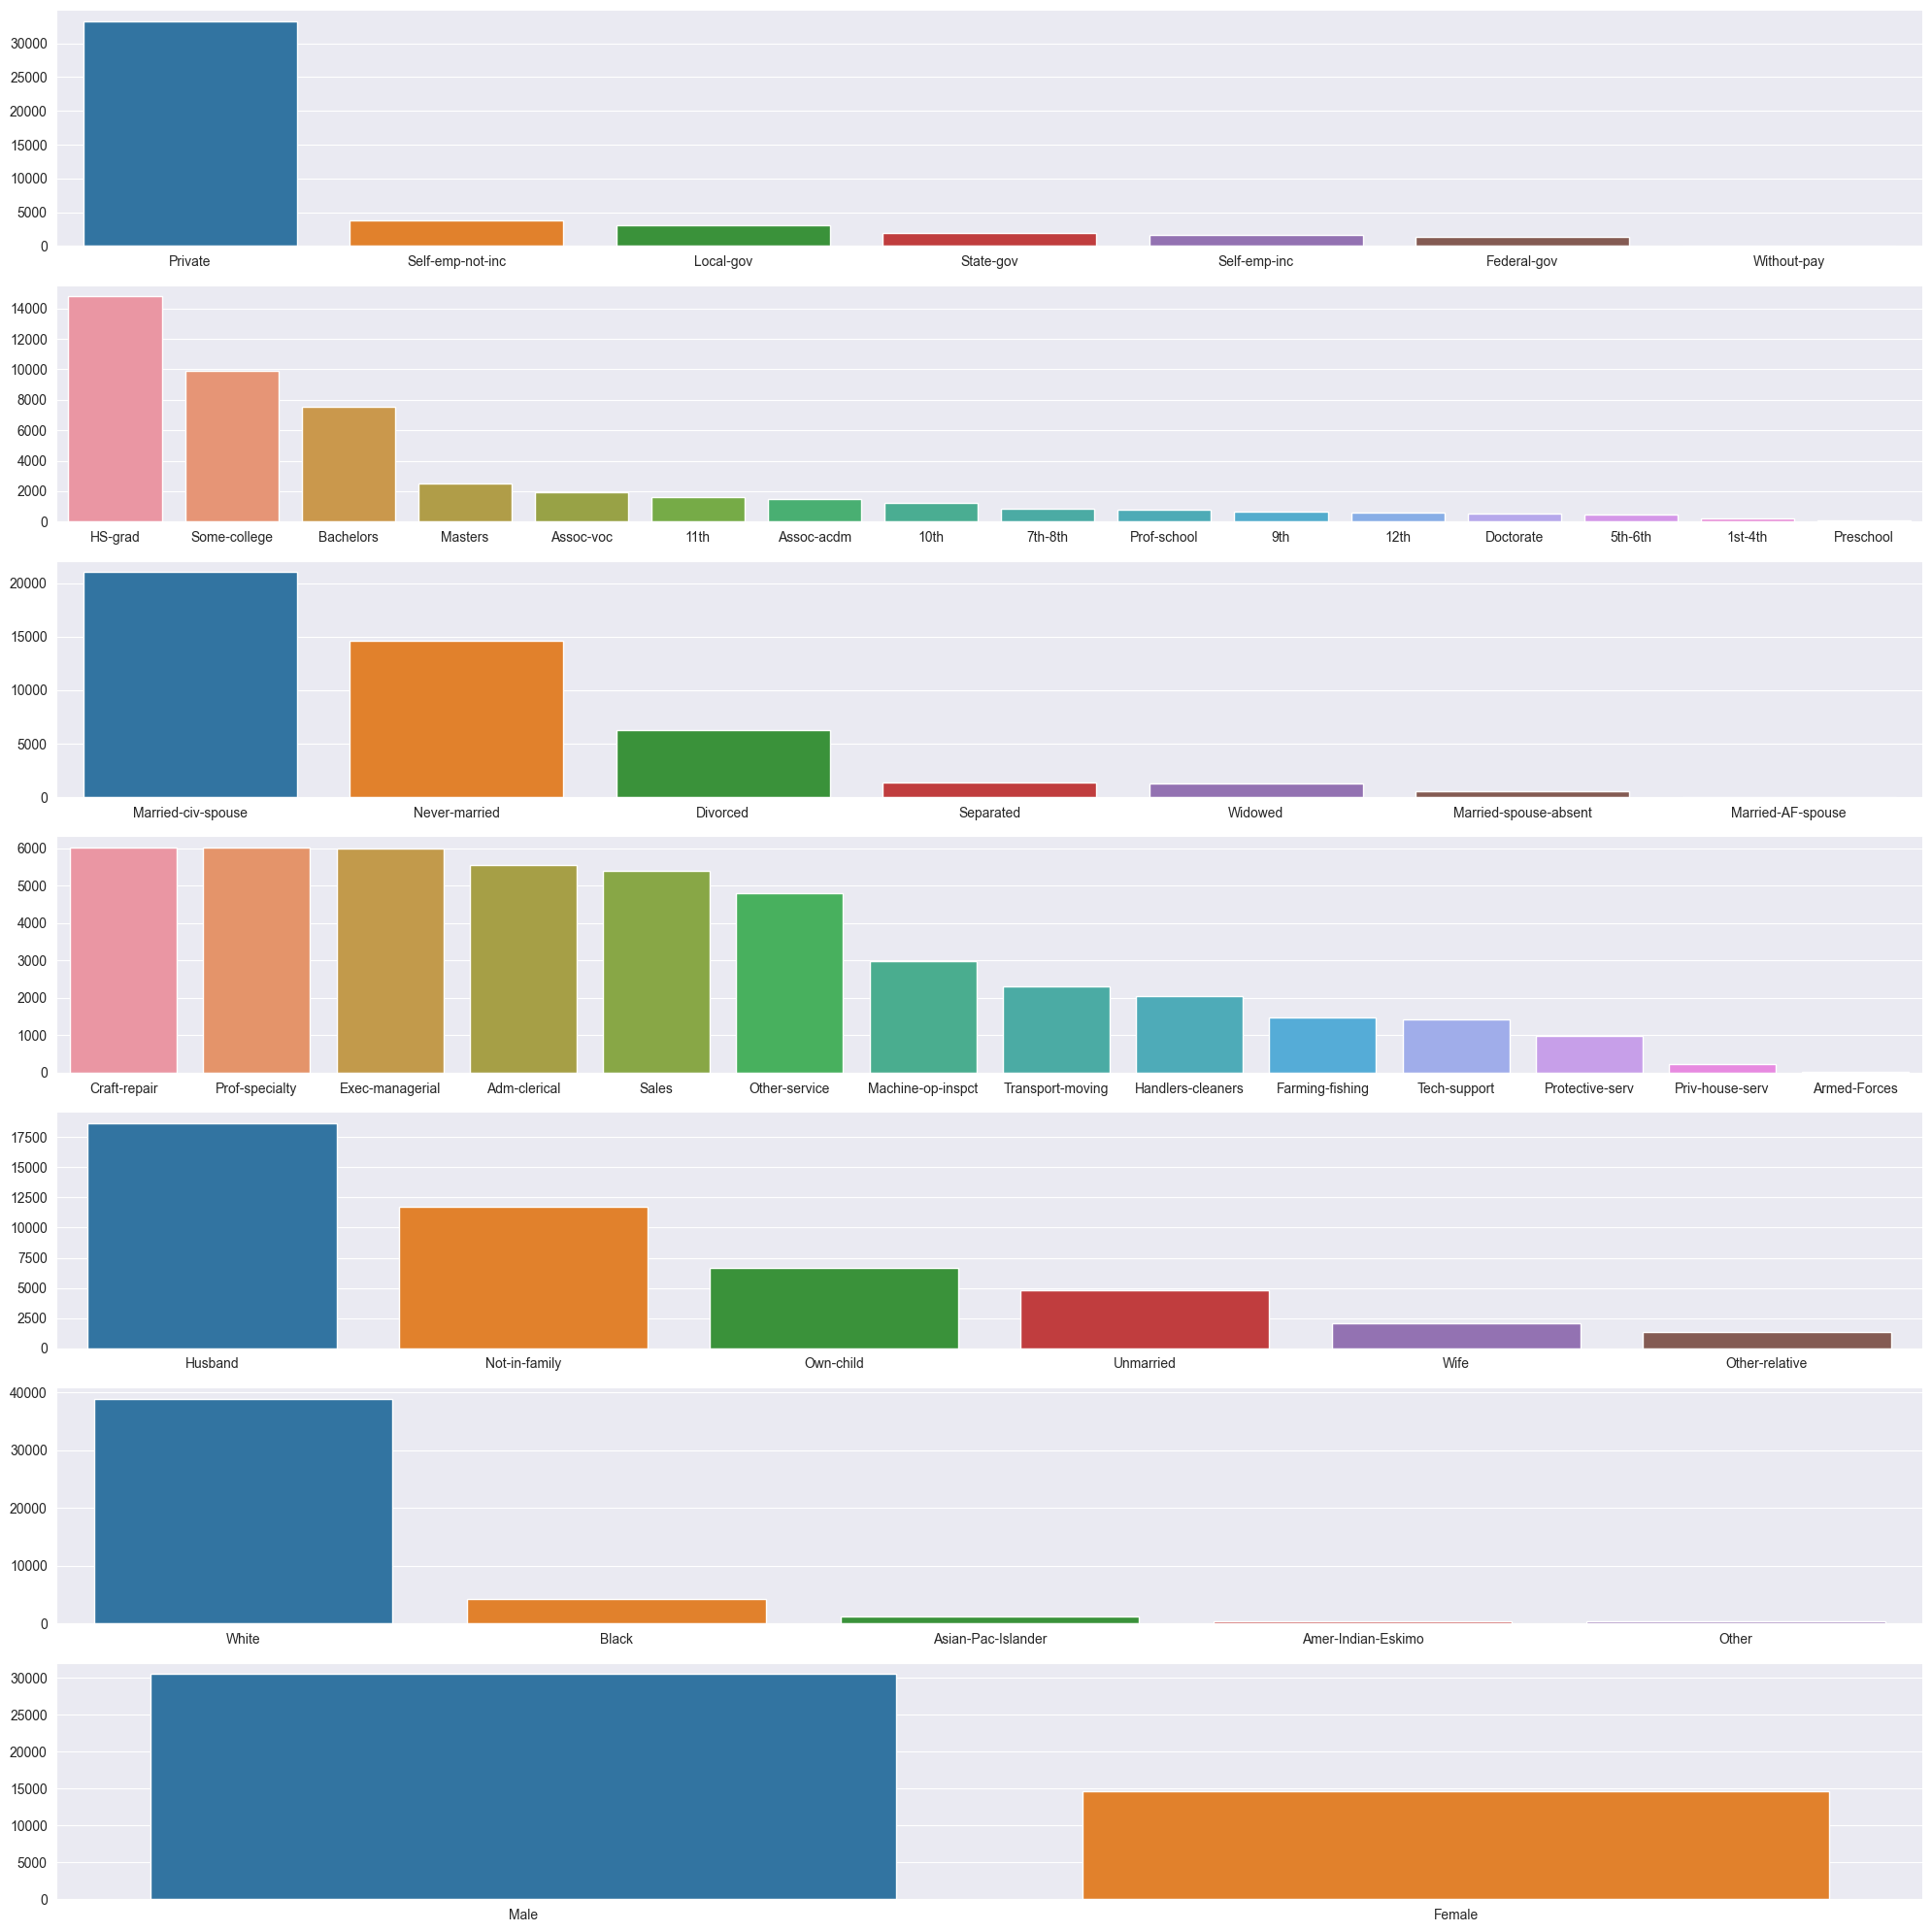

In [11]:
cat_features = ['workclass',
                'education',
                'marital-status',
                'occupation',
                'relationship',
                'race',
                'gender']

init = 1
fig = plt.figure(figsize=(20,20))
for feature in cat_features:
    plt.subplot(7, 1, init)
    sns.countplot(data=df, x=feature, order=df[feature].value_counts().index)
    plt.xlabel('')
    plt.ylabel('')
    init+=1

plt.tight_layout()
plt.show()

Готовим данные для модели
Удаляем колонку education, т.к. она дублирует колонку educational-num
Категориальные переменные преобразуем в dummy-переменные
Целевой признак преобразуем в числовой (LabelEncoder) и выводим в отдельную переменную

In [12]:
df.drop(['education'], axis = 1, inplace = True)

In [13]:
categorical = ['workclass', 'marital-status', 'occupation',
               'relationship', 'race', 'gender', 'native-country', 'educational-num']
df = pd.get_dummies(df, columns=categorical)

In [14]:
le = LabelEncoder()
y = pd.Series (data = le.fit_transform(df['income']))
df.drop(['income'], axis = 1, inplace = True)

In [15]:
df.head()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,educational-num_7,educational-num_8,educational-num_9,educational-num_10,educational-num_11,educational-num_12,educational-num_13,educational-num_14,educational-num_15,educational-num_16
0,25,226802,0,0,40,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,38,89814,0,0,50,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,28,336951,0,0,40,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,44,160323,7688,0,40,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
5,34,198693,0,0,30,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


делим данные на тренировочные и тестовые

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

создаем модели через пайплаан, чотбы было удобнее работать
в пайплайн включаем 2 шага - масштабирование и непосредственно модель

In [17]:
model_lr = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
model_svc = make_pipeline(StandardScaler(), SVC())

тренируем модели

In [18]:
model_lr.fit(X_train, y_train)
model_svc.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

выполняем предсказания

In [19]:
print("точность на тренировочных данных", model_lr.score(X_train, y_train))
print("точность на тестовых данных", model_lr.score(X_test, y_test))

точность на тренировочных данных 0.8486054675622633
точность на тестовых данных 0.8509673852957435


In [20]:
print("точность на тренировочных данных", model_svc.score(X_train, y_train))
print("точность на тестовых данных", model_svc.score(X_test, y_test))

точность на тренировочных данных 0.8589435276556928
точность на тестовых данных 0.8519624101713654


В результате точность моделей очень похожа. Сложно сказать что одна или другая модель работает лучше.

Важно отметить, что точность предсказаний на тестовых и тренировочных данных примерно похожа. Это говорит о том, что качество модели хорошее, модель не переобучена